In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import nltk #NLTK provides  common NLP function
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Text Analysis**

In [4]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
data.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [6]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

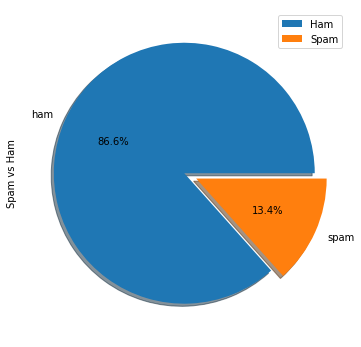

In [7]:
data["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

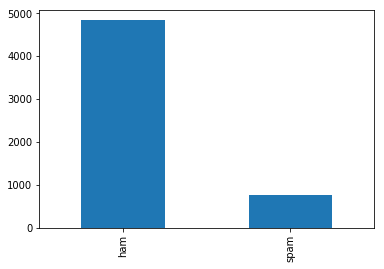

In [8]:
data.label.value_counts().plot.bar()

In [9]:
string.punctuation
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

#def cleanText(message):
  #  message = message.translate(str.maketrans('', '', string.punctuation))
  #  print(message.split())
   # words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
   # return " ".join(words)

#data["text"] = data["text"].apply(cleanText)

In [10]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.

In [11]:
def rx(text):
    # Applying Regular Expression
    #Replace email addresses with 'emailaddr'
    #Replace URLs with 'httpaddr'
    #Replace money symbols with 'moneysymb'
    #Replace phone numbers with 'phonenumbr'
    #Replace numbers with 'numbr'
    print(char for char in txt_no_stop_words)
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', text)
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', text)
    msg = re.sub('£|\$', 'moneysymb', text)
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', text)
    return msg

In [12]:
# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
    return(df)

In [13]:
def cleanText(text):
   #remove punctuation
    txt_no_punctuation=[char for char in text if char not in string.punctuation]
    txt_no_punctuation = "".join(txt_no_punctuation).split()
    #remove stop_words
    txt_no_stop_words=[char.lower() for char in txt_no_punctuation if char.lower() not in stopwords.words("english")]
    # using stemming
    ps=nltk.PorterStemmer()
    clean_text=[ps.stem(word) for word in txt_no_stop_words]
    # using lemmatization
    ws=nltk.WordNetLemmatizer()
    clean_text=[ws.lemmatize(word) for word in txt_no_stop_words]
    return clean_text

data["text_clean"]=data["text"].apply(lambda x:cleanText(x))

In [14]:
#Bag of Words (CountVectorizer)
count_vect=CountVectorizer(analyzer=cleanText)
# convert the documents into a document-term matrix
wm=count_vect.fit_transform(data['text'])
# retrieve the terms found in the corpora
tokens = count_vect.get_feature_names()
# create a dataframe from the matrix
wm2df(wm, tokens)

,0,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,...,åð,åòharry,åòits,åômorrow,åôrents,ì,ìll,ì©,ìï,ìïll
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Doc5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(X_counts.shape)
print(count_vect.get_feature_names())

NameError: name 'X_counts' is not defined

In [16]:
#Bag of Words (CountVectorizer with n_gram)
#ngram_vect=CountVectorizer(ngram_range=(2,2),analyzer=cleanText)
#X_counts=ngram_vect.fit_transform(data['text'])
#print(X_counts.shape)
#print(ngram_vect.get_feature_names())

#Bag of Words (tf idf)
tfidf_vect=TfidfVectorizer(analyzer=cleanText)
X_counts=tfidf_vect.fit_transform(data['text'])
tfidf_vect._validate_vocabulary()
print(X_counts.shape)
print(tfidf_vect.get_feature_names())

(5572, 8902)
['0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '

**Feature Engineering: Feature Creation**


In [17]:
data["text_len"]=data['text'].apply(len)
data.head()

,label,text,text_clean,text_len
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",111
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",49
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",61


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


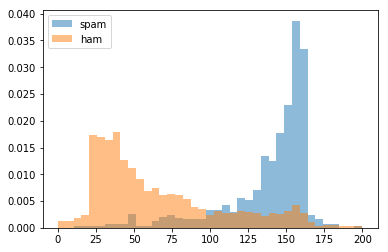

In [18]:
bins=np.linspace(0,200,40)
plt.hist(data[data['label']=='spam']['text_len'],bins,alpha=0.5,normed=True,label='spam')
plt.hist(data[data['label']=='ham']['text_len'],bins,alpha=0.5,normed=True,label='ham')
plt.legend(loc='upper left')
plt.show()

**Building ML Classifiers: Model selection**

**Encoding Labels** 

In [19]:
X = X_counts.toarray()
y = data['label']
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

***Applying Guassian Naive Bayes***

In [21]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)
#Predicting
y_pred = bayes_classifier.predict(X_test)
# Evaluating
cm = confusion_matrix(y_test, y_pred)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[874, 100],
       [ 14, 127]])

In [22]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, bayes_classifier.predict(xtest)))
print (classification_report(ytest, bayes_classifier.predict(xtest)))

NameError: name 'ytest' is not defined

In [23]:
gaussianNb = MultinomialNB()
gaussianNb.fit(X_train, y_train)
y_pred = gaussianNb.predict(X_test)
print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, gaussianNb.predict(X_test)))
print(fbeta_score(y_test, y_pred, beta = 0.5))

Accuracy : 0.96323 


0.9242144177449169


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
